Data Importing:
Get Nvidia, Intel, Radeon data from Alpha Vantage API
Take all close collumns from the three and merge them into a single dataframe 
Check for missing data and eliminate rows with missing data 


In [3]:
!pip3 install beautifulsoup4 

import pandas as pd
import numpy as np
import requests
import json
import seaborn as sb
import matplotlib.pyplot as mp
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IBM&apikey=EA1UQZ4GSY6UBHK6'


data1= { "function":'TIME_SERIES_MONTHLY', 
        "symbol" : 'NVDA', 
        "datatype" : 'json', 
        "apikey" : 'EA1UQZ4GSY6UBHK6' }
r1 = requests.get(url, params= data1)
fileatt1= r1.json()
df = pd.DataFrame(fileatt1["Monthly Time Series"]).T

data2= { "function":'TIME_SERIES_MONTHLY', 
        "symbol" : 'INTC', 
        "datatype" : 'json', 
        "apikey" : 'EA1UQZ4GSY6UBHK6' }
r2 = requests.get(url, params= data2)
fileatt2= r2.json()
df2 = pd.DataFrame(fileatt2["Monthly Time Series"]).T


data3= { "function":'TIME_SERIES_MONTHLY', 
        "symbol" : 'AMD', 
        "datatype" : 'json', 
        "apikey" : 'EA1UQZ4GSY6UBHK6' }
r3 = requests.get(url, params= data3)
fileatt3= r3.json()
df3 = pd.DataFrame(fileatt3["Monthly Time Series"]).T



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


 Access Dataframe using API key and parameters then taking data uploaded as Json and converting to dataframe which is later converted to CSV. Used monthly and have not yet truncated in an effort to view what values are missing. Used transpose function to transpose Dataframes. 

In [4]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-02-19,114.7500,143.4400,113.0100,139.2300,2704545740
2025-01-31,136.0000,153.1300,116.2500,120.0700,5950612536
2024-12-31,138.8300,146.5400,126.8600,134.2900,4086168557
2024-11-29,134.7000,152.8900,131.8000,138.2500,4498075137
2024-10-31,121.7650,144.4200,115.1400,132.7600,5628704792
...,...,...,...,...,...
2000-04-28,83.7200,110.4000,57.0000,89.1300,13503600
2000-03-31,64.0000,150.0000,57.5000,84.4800,36567000
2000-02-29,37.1300,68.2500,35.7500,64.0000,19085100
2000-01-31,47.2500,48.2500,35.0000,37.0600,10294700


^ Testing to see if I had everything right

In [5]:
df.isna()


,1. open,2. high,3. low,4. close,5. volume
2025-02-19,False,False,False,False,False
2025-01-31,False,False,False,False,False
2024-12-31,False,False,False,False,False
2024-11-29,False,False,False,False,False
2024-10-31,False,False,False,False,False
...,...,...,...,...,...
2000-04-28,False,False,False,False,False
2000-03-31,False,False,False,False,False
2000-02-29,False,False,False,False,False
2000-01-31,False,False,False,False,False


In [6]:
df2.isna()

,1. open,2. high,3. low,4. close,5. volume
2025-02-19,False,False,False,False,False
2025-01-31,False,False,False,False,False
2024-12-31,False,False,False,False,False
2024-11-29,False,False,False,False,False
2024-10-31,False,False,False,False,False
...,...,...,...,...,...
2000-04-28,False,False,False,False,False
2000-03-31,False,False,False,False,False
2000-02-29,False,False,False,False,False
2000-01-31,False,False,False,False,False


In [7]:
df3.isna()

,1. open,2. high,3. low,4. close,5. volume
2025-02-19,False,False,False,False,False
2025-01-31,False,False,False,False,False
2024-12-31,False,False,False,False,False
2024-11-29,False,False,False,False,False
2024-10-31,False,False,False,False,False
...,...,...,...,...,...
2000-04-28,False,False,False,False,False
2000-03-31,False,False,False,False,False
2000-02-29,False,False,False,False,False
2000-01-31,False,False,False,False,False


^ Checking for missing values

In [9]:

## Prep for graphs

## Create single dataframe that represents the end of each month close value
df4= {"date": df.index, 
      "Nvidia": df["4. close"], 
      "Intel": df2["4. close"],
      "AMD": df3["4. close"]}
comb= pd.DataFrame(df4)
## Truncate data to only account until 2012 because they're too close until then
comb['date']= pd.to_datetime(comb['date'].head(156))
comb["Nvidia"] = pd.to_numeric(comb["Nvidia"].head(156))
comb["Intel"] = pd.to_numeric(comb["Intel"])
comb["AMD"] = pd.to_numeric(comb["AMD"].head(156))


The jist of what I've done to this point: 
- imported data from Alpha Vantage API
- Checked for missing values 
- Merged my data into a single DataFrame 
- changed dates to datetime left numbers as int64
- analyzed my steps (obviously ^)
- dropped unneccesary data 




<Axes: xlabel='date', ylabel='Nvidia'>

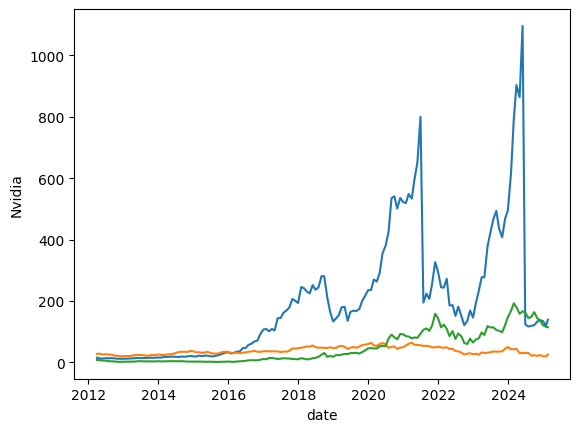

In [10]:
##graph code 
sb.lineplot(comb.reset_index(), x='date', y= 'Nvidia', )
sb.lineplot(comb.reset_index(), x='date', y= 'Intel')
sb.lineplot(comb.reset_index(), x='date', y= 'AMD')

<Axes: xlabel='date', ylabel='Intel'>

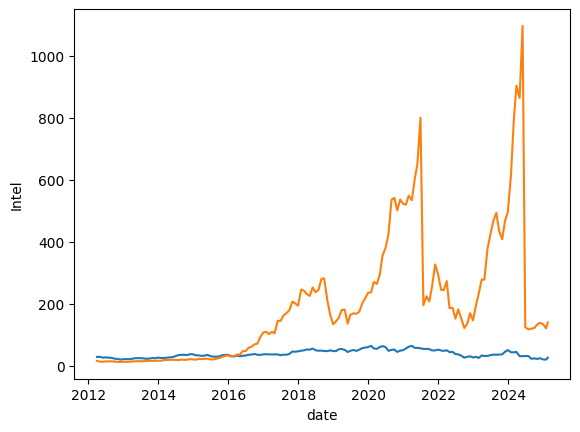

In [11]:
sb.lineplot(comb.reset_index(), x='date', y= 'Intel')
sb.lineplot(comb.reset_index(), x='date', y= 'Nvidia', )

<Axes: xlabel='date', ylabel='AMD'>

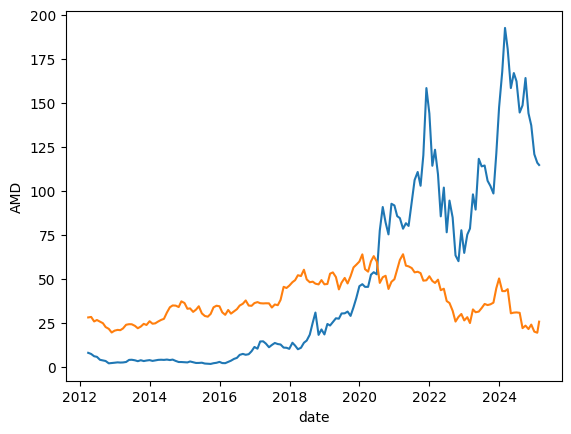

In [12]:
sb.lineplot(comb.reset_index(), x='date', y= 'AMD')
sb.lineplot(comb.reset_index(), x='date', y= 'Intel')

<Axes: xlabel='date', ylabel='Nvidia'>

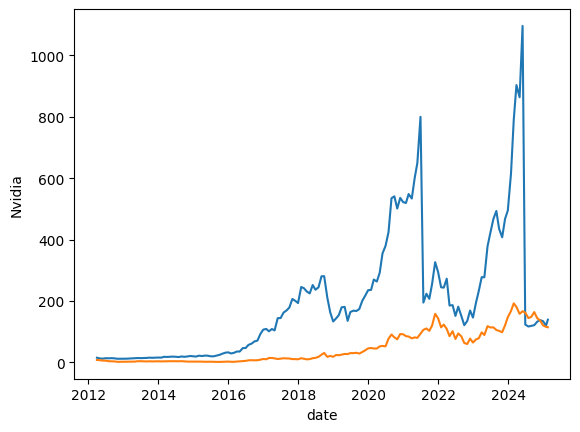

In [13]:
sb.lineplot(comb.reset_index(), x='date', y= 'Nvidia' )
sb.lineplot(comb.reset_index(), x='date', y= 'AMD')

Here ive done the following: 

- visualized all three graphs on the same scale
- visualized each graph with another one in a seperate graph to show any visual correlations in stock. 

<Axes: >

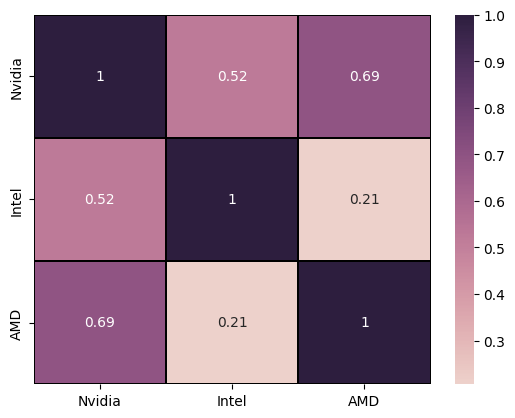

In [14]:
## Heatmap 
## Setting data as csv to be read in heatmap: 
totaled= comb.to_csv("./totaled.csv")
# have pandas read the CSV: 
stuff= pd.read_csv("./totaled.csv")
## Use seaborn to plot corralation heatmap: 
dataplot = sb.heatmap(stuff.corr(numeric_only=True), cmap=sb.cubehelix_palette(as_cmap=True), annot=True, linecolor="black", linewidths= 0.3)
dataplot

Here Ive created a heatmap to show the numerical correlation between my data. So far here's what it shows: 

- 52% match between Nvidia and Intel 
- 69% match between Nividia and AMD 
- 21% match between AMD and Intel

Now, what does this mean in the context of my project? Here's what I think: 

Due to the higher correlation being between Nvidia and AMD I believe that a Ryzen CPU is most commonly paired with an Nvidia GPU. AMD makes both Ryzen CPU's and Radeon GPU's meaning it is hard to show that the correlation comes from the usage of the CPU's and not the GPU's. That being said, I am able to claim that it is indeed the CPU's that are mostly being used because competition in the graphics card market would cause th etwo to go in opposite directions. to justify this we saw that intel and AMD had very low correlation because they were in competition. To further my claim, The correlation was 18% greater between Radeon and Nvidia than between Intel and Nvidia meaning there was a statistically significant difference between the usage of the two corporations in correlation to Nvidia stock. 

A question you may ask yourself when viewing the graphs is "why is Nvidia so much greater than the other two stocks?" There exists a pretty simple answer to this: cryptocurrency and military integration. We can see that the first initial spike for Nvidia comes in the 2016-2018 time period. Thsi is when cryptocurrency began its uptake with Bitcoin. It was still on a slow uprise in GPU purchases but that's because it was still young and slow to be discovered. The reason it correlates to GPU usage is because cryptomining involves the usage of several graphics card units attatched to a central motherboard all dedicated to scowering for crypto. As for the afromentioned military application, the nxt couple of spikes were amidst the war in Ukraine and most millitary aircrafts and systems use Nvidia technology for location and targeting purposes. Thus, when the US government spent billions on helping the Ukranians, Nvidia Stock boomed. This is also the likely reason as to why it recently fell because now that the US has had a change in political leaders, the likelihood that we spend that much on military has gone down significantly in an effort to repair our internal problems. 